In [ ]:
%pip install numba numpy scipy matplotlib

In [2]:
from Setups import Wheel_Setup

fpath = r"d:\Experiments\Andres\DON-111111\20230906\results.npz"

metadata = {
    "radius": 0.1, # wheel radius
    "fps": 10000, # rotary encoder sampling rate
    "clicks_per_rotation": 500, # rotary encoder clicks per rotation
    
    # Optional for Andres
    "task_id": "DON-111111_20230906_Test", # task id
    "method": "2P", # imaging method
}
wheel = Wheel_Setup(key="test", metadata=metadata)
wheel.raw_data_path = fpath


In [3]:
wheel.__dict__

{'key': 'test',
 'root_dir_name': 'TRD-2P',
 'root_dir': WindowsPath('TRD-2P'),
 'method': '2P',
 'preprocess_name': None,
 'static_outputs': {WindowsPath('TRD-2P'): ['results.zip']},
 'variable_outputs': {},
 'data_naming_scheme': '{animal_id}_{session_date}_TRD-2P_{task_names}.mat',
 'identifier': {'animal_id': 'DON-111111',
  'date': '20230906',
  'task_name': 'Test'},
 'raw_data_path': 'd:\\Experiments\\Andres\\DON-111111\\20230906\\results.npz',
 'metadata': {'radius': 0.1,
  'fps': 10000,
  'clicks_per_rotation': 500,
  'task_id': 'DON-111111_20230906_Test',
  'method': '2P',
  'stimulus_length': None,
  'stimulus_sequence': None,
  'stimulus_type': None},
 'wheel': <Setups.Wheel at 0x151fba7d5d0>,
 'track': <Setups.Track at 0x151fba70b50>}

In [4]:
data = wheel.extract_rotary_data(smooth=True)
for key, value in data.items():
    print(key, value.shape)

c:\Users\mauls\OneDrive\Dokumente\Code\temp\Setups.py:468: NumbaTypeSafetyWarning: unsafe cast from UniTuple(array(int32, 1d, C) x 2) to UniTuple(int64 x 2). Precision may be lost.
  state_diff = state_map[state] - state_map[old_state]


distance (3005834,)
velocity (3005833,)
acceleration (3005832,)


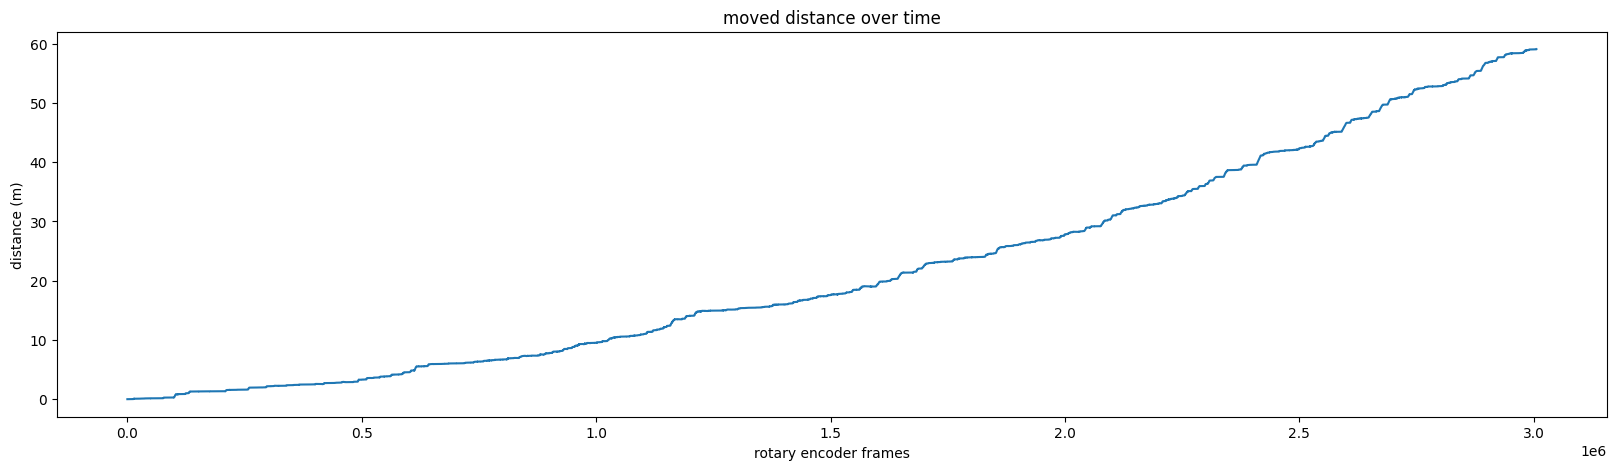

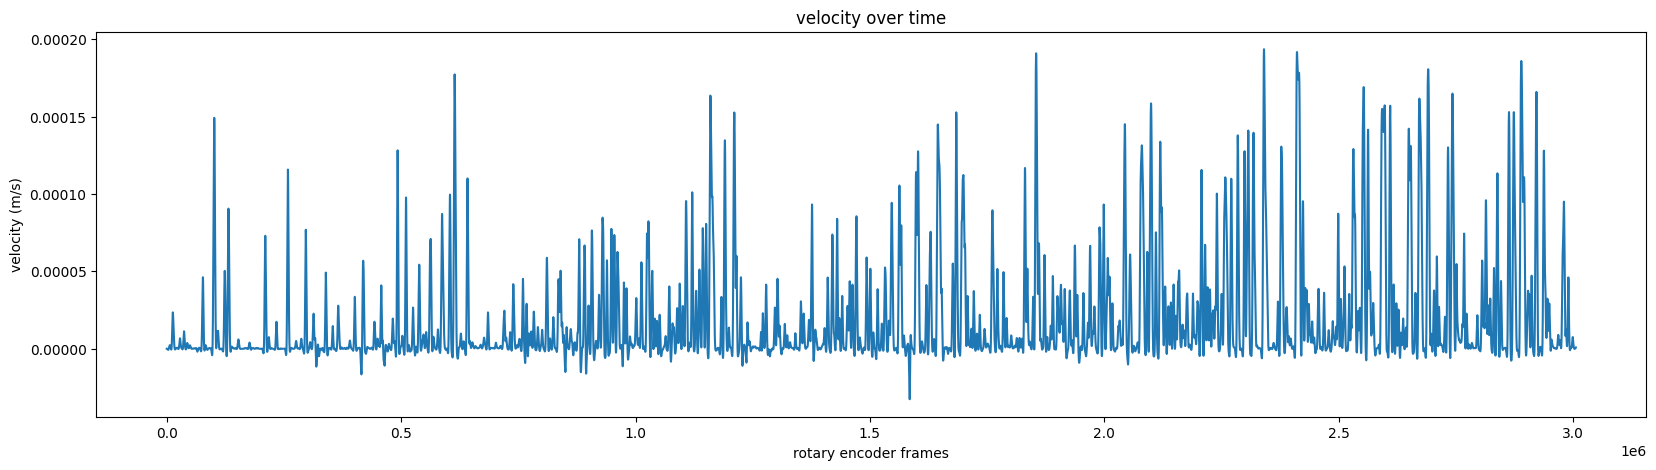

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
plt.title("moved distance over time")
plt.plot(-data["distance"])
plt.xlabel("rotary encoder frames")
plt.ylabel("distance (m)")
plt.show()

plt.figure(figsize=(20, 5))
plt.title("velocity over time")
plt.plot(-data["velocity"])
plt.xlabel("rotary encoder frames")
plt.ylabel("velocity (m/s)")
plt.show()
